# Lecture 9 - Poisson Processes

## L9.1 The Bernoulli approximation
The Poisson process is the continuous-time analog of the Bernoulli process. It works well when there is no natural way to split the time into discrete periods.

Consider the situation of customers arriving on a webpage. We can discretize time into 1 minute intervals and record a success during that minute if there is at least one customer arriving on our website. If the arrival intensity is constant, and different time periods are independent, then we can use a Bernoulli process to model the traffic. Of course, two or more customers could arrive on the same minute, but the Bernoulli process does not keep track of the exact number of customer arrivals, just that at least one arrived during the period, and it does not allow us to calculate the expected number of arrivals in a period. One way around this is to break the interval down into smaller periods, but how small. Should be one second? This would be quite arbitrary and instead of continuing to work with a discrete time process, we can move to a continuous time process...

We can't just decrease the time interval as we also need to decrease the $p$ as well (otherwise the  number of arrivals would explode). If we look at $n$ periods, then the expected number of arrivals is $np$. If we let $n$ increase, without changing $p$ then the arrivals will explode. Thus keep $\lambda = np$ constant, and let $n$ increase and $p$ decrease.

Recall that the distribution of the number of arrivals in $n$ periods is binomial(n,p). If we let $p=\lambda/n$ then the probability of seeing $k$ customers over $n$ periods is

$$p_B(k) = \frac{n!}{(n-k)!k!}p^k(1-p)^{n-k}$$

$$=\frac{n(n-1)...(n-k+1)}{k!}\frac{\lambda^k}{n^k}\left(1-\frac{\lambda}{n}\right)^{n-k}$$

$$= \frac{n}{n}\frac{(n-1)}{n}...\frac{(n-k+1)}{n}\frac{\lambda^k}{k!}\left(1-\frac{\lambda}{n}\right)^{n-k}$$.

Now, if we fix $k$ but let $n \rightarrow \infty$, then the first ratios all tend to 1, and the last term tends to $e^{-\lambda}$.

Thus, for large $n$, we get

$$p_B(k) \rightarrow e^{-\lambda}\frac{\lambda^k}{k!}$$

which is the Poisson distribution.

## L9.2 The Poisson Process - definition 1

In order to define the Poisson process, we will start with some explorations of the exponential distribution.

Recall that a random variable $T$ has an exponential distribution if 

$$P(T \le t) = 1 - e^{-\lambda t}$$

and the pdf is $f_T(t) = \lambda e^{-\lambda t}$ for non-negative $t$. We can use integration by parts to find that $E[T] = 1/\lambda$ and some more integration by parts will reveal that $E[T^2] = 2/\lambda$ from which we can get the variance of $T$ to be $1/\lambda^2$.

The exponential is the only continuous distribution with the lack of memory property, i.e., that $P(T>t+s|T>t) = P(T>s)$. I.e., if we have been waiting for $t$ units of time then the probability that we must wait $s$ more units of time is the same as if we haven't waited at all. Depressing... especially if you are waiting for an unreliable bus driver.

Let's look at exponential races. Let $S$ = exponential($\lambda$) and $T$ = exponential($\mu$) be independent. We are interested to know the distribution of $U = min(S,T)$, the time of the first arrival of the two. We can derive the result by considering $P(min(S,T)>t) = P(S>t, T>t)$.

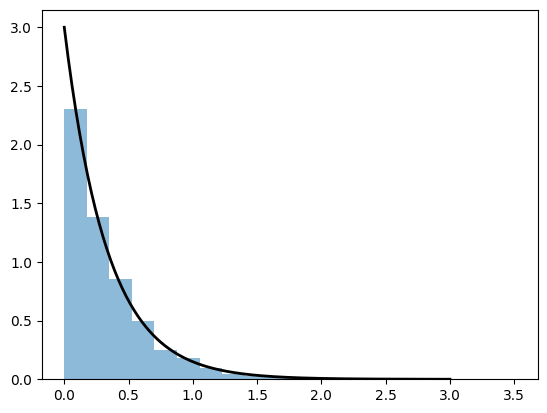

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 10000
lambda_ = 1
mu = 2
s = np.random.exponential(1/lambda_,N)
t = np.random.exponential(1/mu,N)
u = np.minimum(s,t)

plt.hist(u,bins=20,density=True,alpha=0.5)
x = np.linspace(0, 3, 200)
intensity = lambda_ + mu
pdf = intensity*np.exp(-intensity*x)  
plt.plot(x, pdf, 'k', linewidth=2)

This result genralizes to any number of exponential variables.

Another interesting property is around the sum of exponentials with the same intensity:

**Theorem** Let $t_1, t_2, ..., t_n$ be independent exponential($\lambda$) random variables. Then, the sum $T_n = t_1 + t_2 + ...+ t_n$ is a gamma$(n,\lambda)$ distribution, i.e., the density of $T_n$ is

$$ f_{T_n}(t) = \lambda e^{-\lambda t}\frac{(\lambda t)^{n-1}}{(n-1)!}$$

for non-negative $t$. 

The proof follows induction and is not particulary enlightening, so we'll skip it.

Note that $T_n$ is the arrival of the $n$-th customer, and we are saying that it has a gamma distribution. Let's see if that makes sense.

C:\Users\Notandi\AppData\Local\Temp\ipykernel_15352\3852891849.py:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pdf = lambda_*np.exp(-lambda_*t)*np.power(lambda_*t,n-1)/np.math.factorial(n-1)


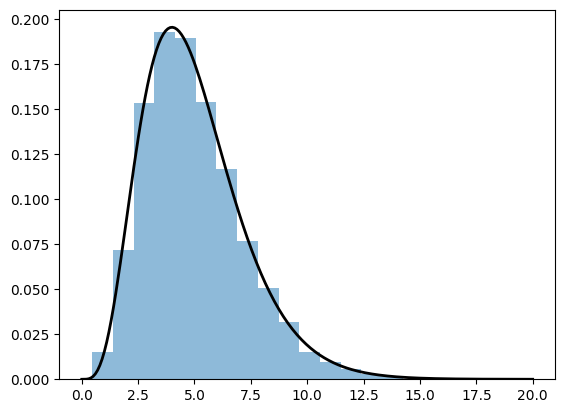

In [8]:
n=5
N = 10000
lambda_ = 1

Tn = np.zeros(N)
for i in range(n):
    Tn += np.random.exponential(1/lambda_,N)
plt.hist(Tn,bins=20,density=True,alpha=0.5)
t = np.linspace(0, 20, 200)
pdf = lambda_*np.exp(-lambda_*t)*np.power(lambda_*t,n-1)/np.math.factorial(n-1)  
plt.plot(t, pdf, 'k', linewidth=2)

Now, the first definition of the Poisson process:

Let $t_1, t_2, .., t_n$ be independent exponential($\lambda$) random variables and $T_n = t_1 + t_2 + ...+ t_n$. Define the **Poisson process** as the stochastic process $N(s) = max\{n: T_n \le t\}$.

Now, this looks a bit criptic, but it is in fact very simple. $N(s)$ is simply the number of arrivals by time $s$. One can look at a timeline to convince oneself that this is the case.

We can compute the distribution of $N(s)$ and see that this is indeed the Poisson distribution. The key is to note that $N(s) = n$ means that $T_n \le s < T_{n+1}$, so $P(N(s) = n) = P(T_n \le s < T_{n+1})$. This probability can be computed by conditioning on $T_n=t$ and using the independence of $T_{n+1}$ and $T_n$. It may be a bit tricky, but we include it here for completeness:

$$P(N(s) = n) = \int_{0}^s{f_{T_n}(t)P(T_{n+1}>s|T_n=t)dt} = \int_{0}^s{f_{T_n}(t)P(T_{n=1}>s-t)dt} = \int_{0}^s{\lambda e^{-\lambda t}\frac{(\lambda t)^{n-1}}{(n-1)!} e^{-\lambda (s-t)}dt} =  e^{-\lambda s}\frac{(\lambda s)^n}{n!}$$


Hence, 

$$P(N(s) = n) = e^{-\lambda s}\frac{(\lambda s)^n}{n!}$$

The mean of the Poisson distribution is $\lambda s$. We will conclude this section with two lemmas that set up the second definition of the Poisson process.

**Lemma** For a fixed $s$, $N(t+s) - N(s)$, $t \ge 0$, is a Poisson process and independendent from all previous values of $N$, i.e., independent from $N(r)$ where $0 \le r \le s$.

This follows from the lack of memory property and independence of the waiting times.

**Lemma** $N(t)$ has independent increments., i.e., if $t_0 < t_1 < t_2 < ... < t_n$ then

$$N(t_1) - N(t_0), N(t_2) - N(t_1), ..., N(t_n) - N(t_{n-1})$$

are all independent.

This follows directly from the previous lemma :-).

## L9.3 The Poisson Process - definition 2 and applications

The second definition is more general in the sense that we can extend it more easily to practical situtions. It can be shown that the two definitions are equivalent. We have seen that definition 1 leads to definition 2, but the reverse is even simpler - just have to show that the waiting times between successive arrivals is exponential. 


The **Poisson process** is the stochastic process $\{N(t), t \ge 0\}$ satisfying:

1. $N(0) = 0$
2. $N(t+s) - N(s) = Poisson(\lambda t)$
3. $N(t)$ has independent increments

It is easy to see that the first waiting time is exponentially distributed by considering $P(T_1>t) = P(N(t) = 0) = e^{-\lambda t}$, and the next time can be shown to be exponential by considering $t_2 = T_2-T_1$ and $P(t_2>t|T_1=s)$, and using independent increments, condition nr. 3:

$$P(t_2>t|T_1=s) = P(\text{No arrival in} (s,s+t]|T_1 = s) = P(N(t+s) - N(s) = 0| N(s) = 1) = P(N(t+s) - N(s) = 0) = e^{-\lambda t}$$

Let's move on and consider some examples.

**Exercise** Consider a store that is open between 10am and 5pm, and that 1 customer arrives every half hour on average ($1/\lambda = 0.5$ hours). (a) How many customers do we expect to see over the day? (b) What is the probability that we will see at least 2 customers before 12? (c) What is the probability that we will see exactly 3 customers before noon and 4 customers after lunch?

C:\Users\Notandi\AppData\Local\Temp\ipykernel_15352\3406406092.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pmf = lambda k:np.exp(-lambda_*T)*(lambda_*T)**k/np.math.factorial(k)


<BarContainer object of 30 artists>

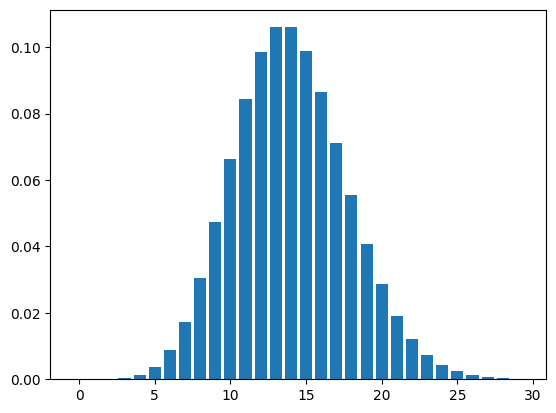

In [4]:
#First, let´s plot the poisson distribution
import matplotlib.pyplot as plt
import numpy as np
lambda_ = 2
T = 7

pmf = lambda k:np.exp(-lambda_*T)*(lambda_*T)**k/np.math.factorial(k)
n = range(0,30)
p = [pmf(k) for k in n]

plt.bar(n,p)

In [11]:
import numpy as np
#Let's do this one using Monte Carlo as well
lambda_ = 2
N = 10000

#First, let's calculate the average
T = 7
s = np.random.poisson(lambda_*T, 10000)
print("Average number of customers per day: ", sum(s)/N)

#Probability of getting at least two customers before noon
T = 2
s = np.random.poisson(lambda_*T, 10000)
print("Probability of getting at least two customers before noon: ", sum(s>1)/N)

#Probability of seeing 3 customers before noon and 4 customers after lunch
#First before noon
T = 2
s = np.random.poisson(lambda_*T, 10000)
t1 = s[s>2]
t2 = t1[t1<4]
p_morning = len(t2)/N
print("Probability of seeing 3 customers before noon: ",p_morning)

T = 5
s = np.random.poisson(lambda_*T, 10000)
t1 = s[s>3]
t2 = t1[t1<5]
p_afternoon = len(t2)/N
print("Probability of seeing 4 customers after noon: ",p_afternoon)
print("Probability of 3 customers before noon and 4 custoemrs afternoon: ", p_morning*p_afternoon)


Average number of customers per day:  13.9946
Probability of getting at least two customers before noon:  0.9095
Probability of seeing 3 customers before noon:  0.1904
Probability of seeing 4 customers after noon:  0.0202
Probability of 3 customers before noon and 4 custoemrs afternoon:  0.00384608


In [6]:
#Can also do this using exponential times - more micro level simulation
#which may allow you to collect other interesting information

## L9.4 Splitting and merging of Poisson Processes

Consider a Poisson process ${N(t), t \ge 0}$ having rate $\lambda$. Suppose, e.g., that the process represents customer arrivals. However, whenever a person enters, we assume we can decide whether the customer is 20 years old or older or under 20. Suppose the probability that the person is 20 or over is $p$, and under 20 with probability $1-p$. We can then consider the processes $N_o(t)$ and $N_u(t)$, i.e., the arrivals of over 20s and the arrivals of under 20.

Then, it turns out that $N_o(t)$ is a Poisson process with rate $p \lambda$, and $N_u(t)$ is Poisson with rate $(1-p) \lambda$. Furthermore, the two processes are independent. This generalizes to the splitting of the processes into any number of components. This can be verified by looking at e.g., the second definition of the Poisson process. $N_u(0) = 0$, the increments are independent, and $N_o(t+s) - N_o(s)$ is Poisson($\lambda s$). For the last one, one can manipulate $Y = N_o(t+s) - N_o(s)$ and $Z = N_u(t+s) - N_u(s)$.

In other words, if you split a Poisson process, you get Poisson processes with lower rates.

Let's see this in action. Consider a liquor store and a Poisson process $N(t)$ representing customer arrivals between 10 am and 18 pm. Suppose 5% of the customers are actually below 20, and they are therefore not allowed to buy anything... Let's check the distribution of the arrivals of under age customers and compare that with a Poisson distribution over the full opening hours of the store. Assume the arrival rate is $\lambda = 10$ customers per hour.

C:\Users\Notandi\AppData\Local\Temp\ipykernel_15352\1611385743.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pmf = lambda k:np.exp(-lambda_*p*T)*(lambda_*p*T)**k/np.math.factorial(k)


<BarContainer object of 8 artists>

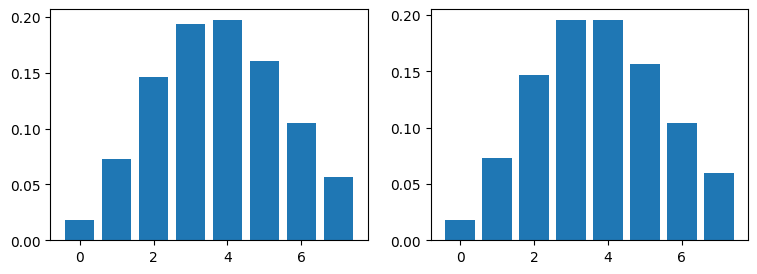

In [7]:
import numpy as np
T = 8
lambda_ = 10
p = 0.05
N = 10000
sample = [] #Sample of under age customers

for i in range(N):
    #One day at a time, and randomly decide if the custoemr is under age or not
    n = np.random.poisson(lambda_*T, 1)[0] #Total number of customers over the day
    underage = 0
    for k in range(n): #for each customer, check if they are underage or not
        if np.random.uniform() <= 0.05:
            underage += 1
    sample.append(underage)

pmf = lambda k:np.exp(-lambda_*p*T)*(lambda_*p*T)**k/np.math.factorial(k)
k = range(0,8)
y = [pmf(kk) for kk in k]

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
#Aggregate the sample by k
sample = np.array(sample)
sim = [len(sample[sample==kk])/N for kk in k]
axs[0].bar(k,sim)
axs[1].bar(k,y)

Merging of Poisson processes works similarly (basically the opposite of splitting). If $N_1(t)$ and $N_2(t)$ are two independent Poisson processes with rates $\lambda$ and $\mu$, then their sum is a Poisson process with rate $\lambda + \mu$.

This can be checked from the second definition as well, but now we need to use a convolution to estimate the probability of the sum of two independent processes. 

**Exercise** Let $N_1(t)$ and $N_2(t)$ be two independent Poisson processes with rates $\lambda_1=1$ and $\lambda_2=2$, respectively. Let $N(t)$ be the merged process $N(t)=N_1(t)+N_2(t)$.

(a) Find the probability that $N(1)=2$ and $N(2)=5$.

(b) Given that $N(1)=2$, find the probability that $N_1(1)=1$ - more tricky.

## More general models - Nonhomogeneous Poisson and Compound Poisson

The Poisson process has many applications, but it has two weaknesses that are often important in practice:

1. The arrivals are assumed to be uniformly distributed in time
2. Only one thing arrives at a time

The **Nonhomogeneous Poisson process** is the stochastic process $\{N(t), t \ge 0\}$ satisfying:

1. $N(0) = 0$
2. $N(t+s) - N(s)$ is Poisson with mean $\int_s^t{\lambda(\tau)d\tau}$
3. $N(t)$ has independent increments

Thus, we are relaxing the uniformity in time. Restaurants, e.g., normally have higher traffic during lunchtime than, say between 10am and 11am. 

Let's consider the following example:

Kaffitar has arrival rate that starts at 0 at 10am, increases to 10 per hour at 12am, to 30 per hour by 2pm, before dropping to 2 by 4pm. What is the distribution of the number of arrivals in a day? What is the probability that no-one will arrive before noon? 

Now, consider a Poisson process (nonhomogeneous or not), and associate with each arrival $i$ a random variable $X_i$, assuming that all of the $X$'s are independendent and independent from the underlying Poisson process. We can think of some reward or cost associated with each arrival (e.g., the amount sold to a customer, or the loss experienced in an accident).

The **Compound Poisson process** is the sum of the impacts

$$S(t) = X_1 + X_2 + ... + X_{N(t)}$$.

This process has some nice properties, and signicant applications. One of its main properties is that

$$E[S(t)] = E[N(t)]E[X]$$

when the $X_i$ are iid (which is often assumed in practice).

The compound process has many applications, e.g., in insurance, credit risk measurements, and in general business. One often uses the compound process in Monte Carlo simulations, and here is one example.

Suppose that car accidents happen at a rate of 1 per hour over 10 hour days, and that the damage experienced is lognormally distributed with mean 300 thousand and standard deviation of 500 thousand. What is the expected loss over a day? How does the distribution look like? What is the probability that we will lose more than 5m in a day? This is relatively straight forward to answer using Monte Carlo.

## Homework

1. Suppose that the time to repair a machine is exponentially distributed with a mean of 2 hours. (a) What is the proability that the repair takes more than 2 hours? (b) What is the proability that the repair takes more than 5 hours given that it takes more than 3 hours?

2. Consider a lunch restaurant that is open between 11am and 2pm, and that 1 customer arrives every 5 minutes on average ($1/\lambda = 1/12$ hours). (a) How many customers do we expect to see over the day? (b) What is the probability that we will see at least 2 customers before 12 noon? (c) If the restaurant has 15 seats, and we assume that each customer will dine for 1 hour, what is the probability that all seats will be occupied at 12 noon? 

**Splitting**

3. The traffic over a particular road follows a Poisson process with a rate of 2/3 of car per minute. 10% of the vehicles are tructs and the other 90% are cars. (a) What is the probability that at least one truck passes in anhour? (b) Given 10 trucks have passed in an hour, what is the expected number of of vehicles that have passed by? (c) Given that 50 cars have passed in an hour, what is the probability that there exactly 5 trucks and 45 cars?

**Merging**

4. Females and males arrive at a rock concert at times of independent Possion processes with rates 30 and 20, respectively. (a) What ist he probability that the first three customers are female? (b) If exactly 2 customers arrived in the first 5 minutes, what is the proability that both arrived in the first 3 minutes?